In [1]:
import tensorflow as tf
import numpy as np
import math
import timeit
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.constraints import max_norm
from PIL import Image
import keras.backend as K
from multi_gpu import make_parallel
import time
from random import shuffle
path = '/home/grads/n/narendra5/Desktop/Programs/LER_machine_learning/'

Using TensorFlow backend.


In [2]:

sigmas = [0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6]
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Xis = [6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40]
widths = [20, 30]

for sigma in sigmas:
    for alpha in alphas:
        for Xi in Xis:
            for width in widths:
                for s in range(2):
                    space = math.floor(width*2**s)
                    shift = math.floor(-25 + (width + space/2 + Xi + alpha*10 + sigma*10)%16) 

                    original_file = path + 'original_images4/oim_' + "{:.2g}".format(sigma*1e-09) + '_' + str(alpha) + '_' + "{0:.2g}".format(Xi*1e-09) + '_' + str(width) + '_' + str(space) + '_' + str(-shift) + '.tiff'
                    linescan_file = path + 'linescans/linescan_' + "{:.2g}".format(sigma*1e-09) + '_' + str(alpha) + '_' + "{0:.2g}".format(Xi*1e-09) + '_' + str(width) + '_' + str(space) + '.txt'

                    linescan = []
                    with open(linescan_file,'r') as f:
                        for i,line in enumerate(f):
                            if i < 14336:
                                a, b = line.split(',')
                                linescan.append(float(b))
                            else:
                                break

                    linescan = np.array(linescan)
                    linescan = linescan + shift
                    linescan = linescan.round().astype(int)
                    edgeimage = np.zeros((1024,256))
                    for k in range(14):                                  #for k edges
                        if k%2 == 0:                                    #keep even edges same 
                            edge = linescan[k*1024:(k+1)*1024]
                        else:
                            edge = np.flip(linescan[k*1024:(k+1)*1024],0)  #flip odd edges

                        for i in range(1024):
                            if edge[i] >= 0 and edge[i] <= 255:
                                edgeimage[i, edge[i]] = 1
                                edgeimage[i, edge[i]] = 1

                    edge_file = path + 'edge_images4/eim_' + "{:.2g}".format(sigma*1e-09) + '_' + str(alpha) + '_' + "{0:.2g}".format(Xi*1e-09) + '_' + str(width) + '_' + str(space) + '_' + str(-shift) + '.tiff'
                    im = Image.fromarray(edgeimage)
                    im.save(edge_file)

(1024, 256)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0 255 255 255 255 255 255   0   0
   0   0 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0 255 255   0   0   0   0   0
   0   0 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   

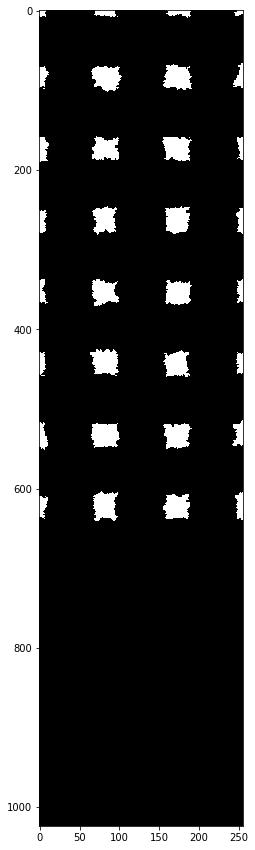

0


In [13]:
sigma = 1.0
alpha = 0.5
Xi = 30
width = 20
space = 20
shift = math.floor(-25 + (width + space/2 + Xi + alpha*10 + sigma*10)%16)
#edge_file = path + 'edge_images4/eim_' + "{:.2g}".format(sigma*1e-09) + '_' + \
#                    str(alpha) + '_' + "{0:.2g}".format(Xi*1e-09) + '_' + \
#                    str(width) + '_' + str(space) + '_' + str(-shift) + '.tiff'
edge_file = path + 'Artimagen_code/rough_curve.tiff'
edge_im = np.array(Image.open(edge_file))
print(edge_im.shape)
print(edge_im[100,:])
plt.figure(figsize = (15,15))
plt.imshow(edge_im, cmap ='gray')
plt.show()

print(np.sum(np.logical_and((edge_im > 0),(edge_im < 255))))